In [315]:
#import necessary libraries

import pandas as pd 
import numpy as np 
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt 
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import preprocessing

In [316]:
#load data 
dataframe = pd.read_csv('experiment1.csv')
dataframe2 = pd.read_csv('experiment1_1.csv')

#displaying number of records and parameters in experiment6.csv
print("Number of Records:", len(dataframe))
print("Number of Parameters:", len(dataframe.columns))

#displaying number of records and parameters in experiment6_1.csv
print('Number of Records:', len(dataframe2))
print('Number of Parameters', len(dataframe2.columns))

Number of Records: 52800
Number of Parameters: 17
Number of Records: 52800
Number of Parameters 17


In [317]:
#checking if there is any null value in the experiment6.csv
dataframe.isnull().sum()

#checking if there is any null value in the experiment6_1.csv
dataframe2.isnull().sum()

dx                  0
fa                  0
fca                 0
fm                  0
fod                 0
fstd                0
kpr                 0
kts                 0
ra                  0
re                  0
skew                0
sod                 0
sre                 0
std                 0
thp                 0
vf                  0
measured_wearout    0
dtype: int64

Coefficients:  [[-0.    0.66  0.69 -0.82 -0.    0.2   0.   -0.09  0.    0.    0.06  0.
   0.   -0.62 -0.02  0.  ]]
Intercepts:  [0.21]
r2:  0.9702
MAE:  0.0188
MSE:  0.0007
RMSE:  0.0257


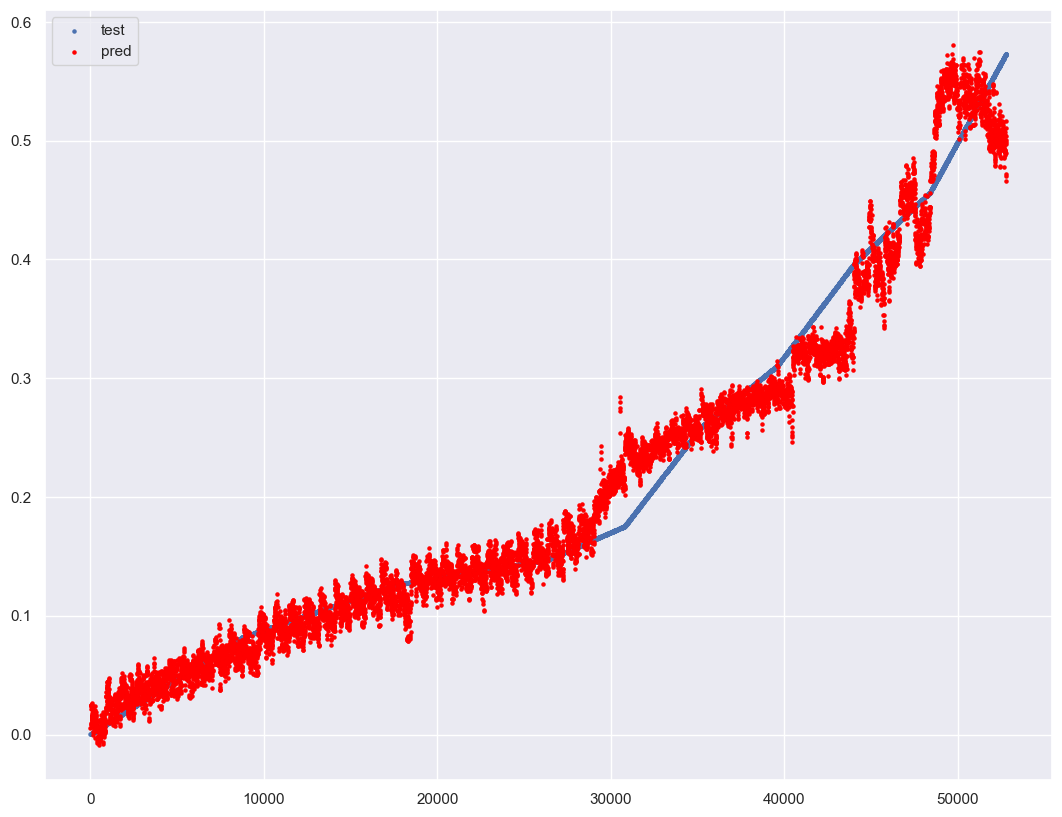

In [318]:
#Single Cutter
#16 Parameters

#Prepare input x and output y 
x = dataframe.drop(['measured_wearout'],axis=1)
y = dataframe[['measured_wearout']]

#transform the features into standard scaler
scaler = StandardScaler()
x_scaled_data = scaler.fit_transform(x)

#split the data into training / testing sets 
#split the data into 80% training, 20% testing randomly
#random_state = 5
x_train,x_test,y_train,y_test = train_test_split(x_scaled_data,y,test_size=0.2,random_state=5)

#build regression model
model = LinearRegression(fit_intercept=True)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
plt.scatter(y_test.index,y_test,s=5,label='test')
plt.scatter(y_test.index,y_pred,c='red',s=5,label='pred')
plt.legend()

#model coefficients
#random_state = 5  
print("Coefficients: ",np.round(model.coef_,2))
print("Intercepts: ",np.round(model.intercept_,2))

#evaluation of accuracy
#random_state = 5
mean_absolute_error = metrics.mean_absolute_error(y_test,y_pred)
mse = metrics.mean_squared_error(y_test,y_pred)
median_absolute_error = metrics.median_absolute_error(y_test,y_pred)
r2 = metrics.r2_score(y_test,y_pred)

print('r2: ',round(r2,4))
print('MAE: ',round(mean_absolute_error,4))
print('MSE: ',round(mse,4))
print('RMSE: ',round(np.sqrt(mse),4))


Text(0.5, 0, 'Inputs')

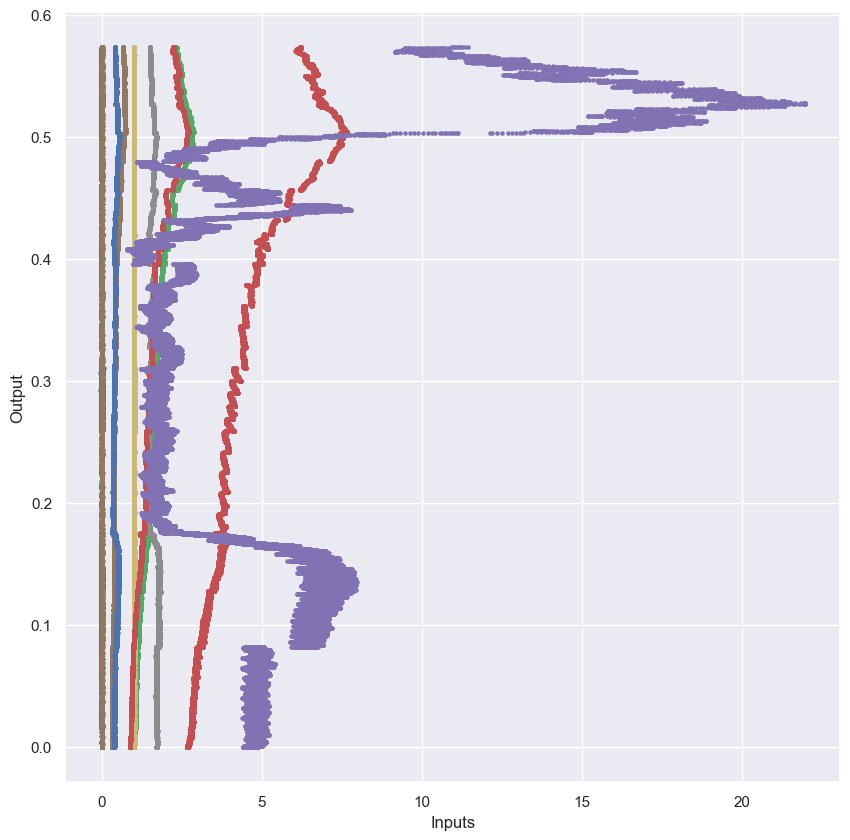

In [319]:
#scatter plot of 16 inputs

plt.figure(figsize=(10,10))
plt.scatter(dataframe['dx'],dataframe['measured_wearout'],s=5)
plt.scatter(dataframe['fa'],dataframe['measured_wearout'],s=5)
plt.scatter(dataframe['fca'],dataframe['measured_wearout'],s=5)
plt.scatter(dataframe['fm'],dataframe['measured_wearout'],s=5)
plt.scatter(dataframe['fod'],dataframe['measured_wearout'],s=5)
plt.scatter(dataframe['fstd'],dataframe['measured_wearout'],s=5)
plt.scatter(dataframe['kpr'],dataframe['measured_wearout'],s=5)
plt.scatter(dataframe['kts'],dataframe['measured_wearout'],s=5)
plt.scatter(dataframe['ra'],dataframe['measured_wearout'],s=5)
plt.scatter(dataframe['re'],dataframe['measured_wearout'],s=5)
plt.scatter(dataframe['skew'],dataframe['measured_wearout'],s=5)
plt.scatter(dataframe['sod'],dataframe['measured_wearout'],s=5)
plt.scatter(dataframe['sre'],dataframe['measured_wearout'],s=5)
plt.scatter(dataframe['std'],dataframe['measured_wearout'],s=5)
plt.scatter(dataframe['thp'],dataframe['measured_wearout'],s=5)
plt.scatter(dataframe['vf'],dataframe['measured_wearout'],s=5)
plt.ylabel('Output')
plt.xlabel('Inputs')

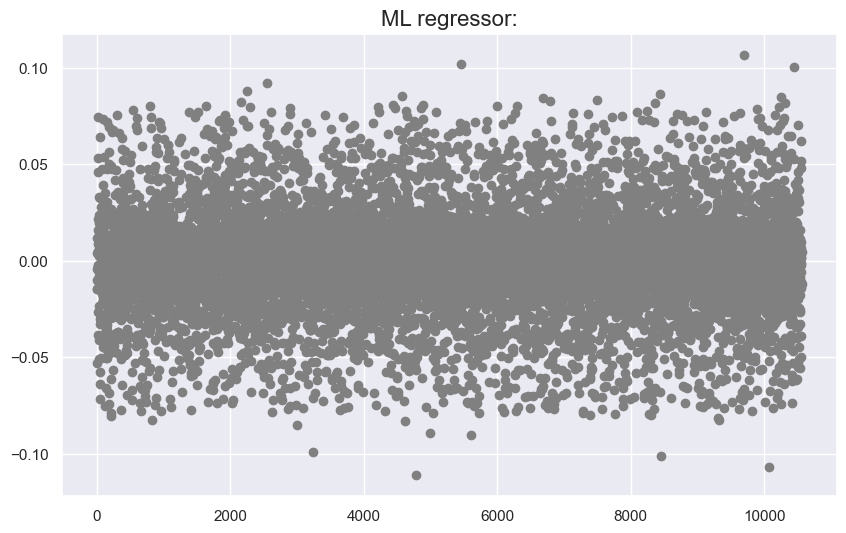

In [320]:
#Error Analysis

index_list = []
for i in range(0, len(y_pred)):
    index_list.append(i)
y_residual = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.title("ML regressor:", size=16)

plt.scatter(index_list, y_residual, c='grey')
plt.show()


In [321]:
#Testing of Multiple Random States #1

#random_state = 1
x_train,x_test,y_train,y_test = train_test_split(x_scaled_data,y,test_size=0.2,random_state=1)

#build regression model
model = LinearRegression(fit_intercept=True)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print("Coefficients: ",np.round(model.coef_,2))
print("Intercepts: ",np.round(model.intercept_,2))

#evaluation of accuracy 
#random_state = 1
mean_absolute_error = metrics.mean_absolute_error(y_test,y_pred)
mse = metrics.mean_squared_error(y_test,y_pred)
median_absolute_error = metrics.median_absolute_error(y_test,y_pred)
r2 = metrics.r2_score(y_test,y_pred)

print('r2: ',round(r2,4))
print('MAE: ',round(mean_absolute_error,4))
print('MSE: ',round(mse,4))
print('RMSE: ',round(np.sqrt(mse),4))


Coefficients:  [[-0.    0.6   0.68 -0.75 -0.    0.2   0.   -0.09  0.    0.    0.06  0.
   0.   -0.61 -0.02  0.  ]]
Intercepts:  [0.21]
r2:  0.9722
MAE:  0.0181
MSE:  0.0006
RMSE:  0.0248


In [322]:
#Testing of Multiple Random States #2

#random_state = 10
x_train,x_test,y_train,y_test = train_test_split(x_scaled_data,y,test_size=0.2,random_state=10)

model = LinearRegression(fit_intercept=True)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print("Coefficients: ",np.round(model.coef_,2))
print("Intercepts: ",np.round(model.intercept_,2))

#evaluation of accuracy 
#random_state = 10
mean_absolute_error = metrics.mean_absolute_error(y_test,y_pred)
mse = metrics.mean_squared_error(y_test,y_pred)
median_absolute_error = metrics.median_absolute_error(y_test,y_pred)
r2 = metrics.r2_score(y_test,y_pred)

print('r2: ',round(r2,4))
print('MAE: ',round(mean_absolute_error,4))
print('MSE: ',round(mse,4))
print('RMSE: ',round(np.sqrt(mse),4))

Coefficients:  [[-0.    0.58  0.69 -0.75 -0.    0.2   0.   -0.09  0.    0.    0.06  0.
   0.   -0.61 -0.02  0.  ]]
Intercepts:  [0.21]
r2:  0.9708
MAE:  0.0186
MSE:  0.0006
RMSE:  0.0254


In [323]:
#Testing of Multiple Random States #3

#random_state = 15
x_train,x_test,y_train,y_test = train_test_split(x_scaled_data,y,test_size=0.2,random_state=15)

#build regression model
model = LinearRegression(fit_intercept=True)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print("Coefficients: ",np.round(model.coef_,2))
print("Intercepts: ",np.round(model.intercept_,2))

#evaluation of accuracy 
#random_state = 15
mean_absolute_error = metrics.mean_absolute_error(y_test,y_pred)
mse = metrics.mean_squared_error(y_test,y_pred)
median_absolute_error = metrics.median_absolute_error(y_test,y_pred)
r2 = metrics.r2_score(y_test,y_pred)

print('r2: ',round(r2,4))
print('MAE: ',round(mean_absolute_error,4))
print('MSE: ',round(mse,4))
print('RMSE: ',round(np.sqrt(mse),4))

Coefficients:  [[-0.    0.61  0.69 -0.77 -0.01  0.2   0.   -0.09  0.    0.    0.06  0.
   0.   -0.61 -0.02  0.  ]]
Intercepts:  [0.21]
r2:  0.9712
MAE:  0.0184
MSE:  0.0006
RMSE:  0.0252


In [324]:
#Correlation Analysis for Single Cutter

#finding correlation between input and output 

corr = dataframe.corr(method='pearson')
corr.style.background_gradient(cmap='coolwarm')



,dx,fa,fca,fm,fod,fstd,kpr,kts,ra,re,skew,sod,sre,std,thp,vf,measured_wearout
dx,1.000000,-0.016397,-0.015566,-0.016382,0.151485,-0.019501,0.236075,0.020401,0.024571,0.149882,0.014379,0.024294,-0.053832,-0.016547,-0.030861,-0.038910,-0.018769
fa,-0.016397,1.000000,0.993651,0.999998,-0.021336,0.969552,-0.008399,-0.452833,-0.344020,-0.022650,0.017841,-0.000685,0.443811,0.996317,0.213484,0.009565,0.951356
fca,-0.015566,0.993651,1.000000,0.993673,-0.019614,0.941937,-0.010766,-0.541523,-0.342532,-0.021260,-0.076571,-0.001175,0.457496,0.998297,0.121392,0.012908,0.969499
fm,-0.016382,0.999998,0.993673,1.000000,-0.021310,0.969449,-0.008407,-0.452830,-0.344036,-0.022629,0.018066,-0.000680,0.443857,0.996312,0.213163,0.009567,0.951441
fod,0.151485,-0.021336,-0.019614,-0.021310,1.000000,-0.027488,0.181637,0.024408,0.013893,0.935470,0.013342,0.419819,-0.104734,-0.023502,-0.069457,0.164729,-0.025214
fstd,-0.019501,0.969552,0.941937,0.969449,-0.027488,1.000000,-0.010707,-0.313568,-0.350943,-0.026561,0.140911,0.000067,0.413065,0.957079,0.421187,0.005785,0.888271
kpr,0.236075,-0.008399,-0.010766,-0.008407,0.181637,-0.010707,1.000000,0.020649,0.081879,0.172510,0.015743,0.062578,-0.051411,-0.011049,-0.012199,0.013630,-0.013814
kts,0.020401,-0.452833,-0.541523,-0.452830,0.024408,-0.313568,0.020649,1.000000,0.130769,0.029795,0.815291,0.001924,-0.364388,-0.522195,0.479635,-0.035926,-0.618220
ra,0.024571,-0.344020,-0.342532,-0.344036,0.013893,-0.350943,0.081879,0.130769,1.000000,0.014659,-0.044246,0.002104,-0.084092,-0.344512,-0.091661,0.004326,-0.319012
re,0.149882,-0.022650,-0.021260,-0.022629,0.935470,-0.026561,0.172510,0.029795,0.014659,1.000000,0.015405,0.139707,-0.161435,-0.025180,-0.063560,0.058114,-0.027610


In [325]:
#ranking the correlation with respect to the output in descending
rank = abs(dataframe.corr()['measured_wearout']).sort_values(ascending=False)
rank

measured_wearout    1.000000
fca                 0.969499
std                 0.964946
fm                  0.951441
fa                  0.951356
fstd                0.888271
kts                 0.618220
sre                 0.471281
ra                  0.319012
skew                0.139001
thp                 0.040492
re                  0.027610
fod                 0.025214
dx                  0.018769
vf                  0.017909
kpr                 0.013814
sod                 0.000140
Name: measured_wearout, dtype: float64

Coefficients:  [[ 0.41 -0.05  2.4  -2.68  0.06]]
Intercepts:  [0.21]
r2:  0.9545
MAE:  0.024
MSE:  0.001
RMSE:  0.0318


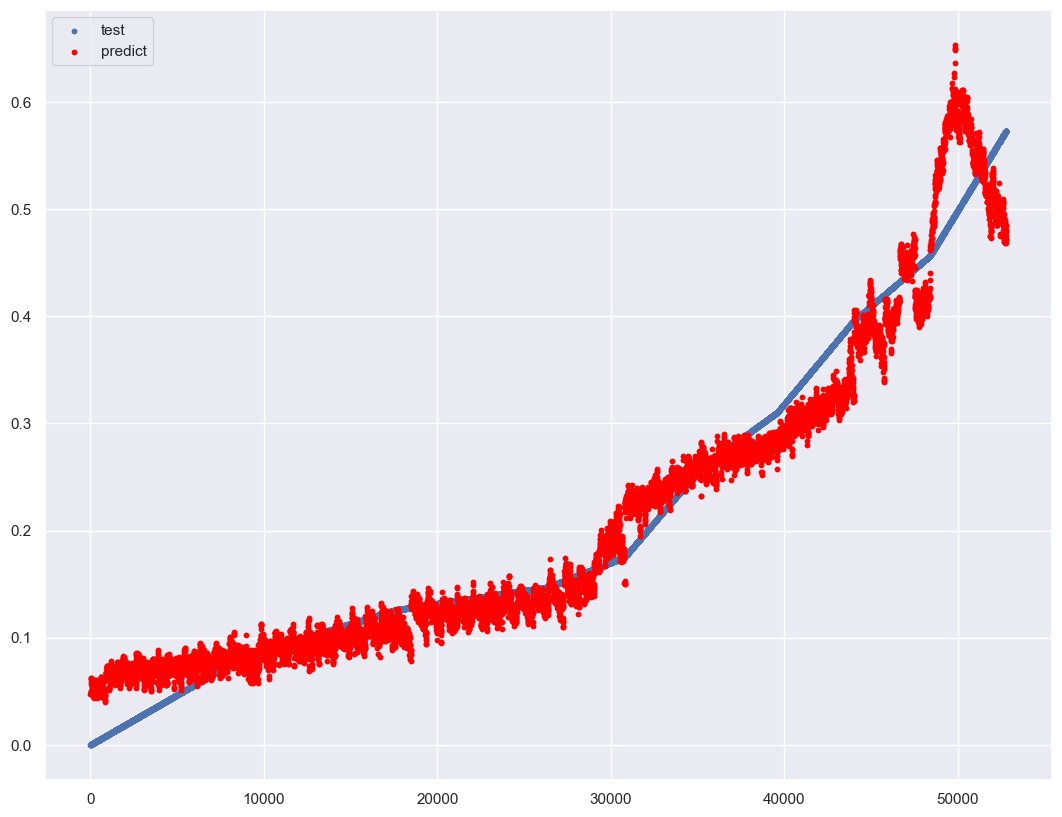

In [326]:
#selecting features that have correlation more than 0.7
rank1 = rank[rank>0.7].sort_values(ascending=False)
newrank1 = rank1.drop('measured_wearout')

#prepare input and output 
x1 = dataframe[newrank1.index]
y1 = dataframe[['measured_wearout']]

#transform the features into standard scaler
scaler = StandardScaler()
x1_scaled_data = scaler.fit_transform(x1)

#split the data into training / testing sets 
#split the data into 80% training, 20% testing randomly
#random_state = 5
x1_train,x1_test,y1_train,y1_test = train_test_split(x1_scaled_data,y1,test_size=0.2,random_state=5)

#build regression model
model1= LinearRegression(fit_intercept=True)
model1.fit(x1_train,y1_train)
y1_pred = model1.predict(x1_test)
plt.scatter(y1_test.index,y1_test,s=10,label='test')
plt.scatter(y1_test.index,y1_pred,color='red',s=10,label='predict')
plt.legend()

#model coefficients 
#random_state = 5
print("Coefficients: ",np.round(model1.coef_,2))
print("Intercepts: ",np.round(model1.intercept_,2))

#evaluation of accuracy 
#random_ state = 5 
mean_absolute_error = metrics.mean_absolute_error(y1_test,y1_pred)
mse = metrics.mean_squared_error(y1_test,y1_pred)
median_absolute_error = metrics.median_absolute_error(y1_test,y1_pred)
r2 = metrics.r2_score(y1_test,y1_pred)

print('r2: ',round(r2,4))
print('MAE: ',round(mean_absolute_error,4))
print('MSE: ',round(mse,4))
print('RMSE: ',round(np.sqrt(mse),4))

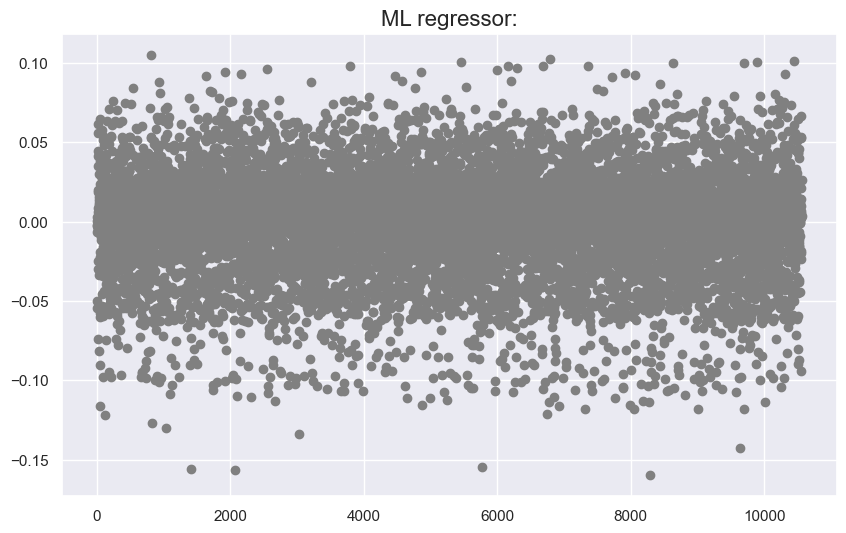

In [327]:
#Error Analysis

index_list = []
for i in range(0, len(y1_pred)):
    index_list.append(i)
y1_residual = y1_test - y1_pred
plt.figure(figsize=(10, 6))
plt.title("ML regressor:", size=16)

plt.scatter(index_list, y1_residual, c='grey')
plt.show()

In [328]:
#Testing of Multiple Random States #1

#Threshold more than 0.7
#Random_State = 1

x1_train,x1_test,y1_train,y1_test = train_test_split(x1_scaled_data,y1,test_size=0.2,random_state=1)

#build regression model
model1= LinearRegression(fit_intercept=True)
model1.fit(x1_train,y1_train)
y1_pred = model1.predict(x1_test)

#model coefficients 
#random_state = 1
print("Coefficients: ",np.round(model1.coef_,2))
print("Intercepts: ",np.round(model1.intercept_,2))

#evaluation of accuracy 
#random_ state = 1
mean_absolute_error = metrics.mean_absolute_error(y1_test,y1_pred)
mse = metrics.mean_squared_error(y1_test,y1_pred)
median_absolute_error = metrics.median_absolute_error(y1_test,y1_pred)
r2 = metrics.r2_score(y1_test,y1_pred)

print('r2: ',round(r2,4))
print('MAE: ',round(mean_absolute_error,4))
print('MSE: ',round(mse,4))
print('RMSE: ',round(np.sqrt(mse),4))

Coefficients:  [[ 0.4  -0.04  2.42 -2.69  0.06]]
Intercepts:  [0.21]
r2:  0.9549
MAE:  0.0238
MSE:  0.001
RMSE:  0.0316


In [329]:
#Testing of Multiple Random States #2

#Threshold more than 0.7
#Random_State = 10

x1_train,x1_test,y1_train,y1_test = train_test_split(x1_scaled_data,y1,test_size=0.2,random_state=10)

#build regression model
model1= LinearRegression(fit_intercept=True)
model1.fit(x1_train,y1_train)
y1_pred = model1.predict(x1_test)

#model coefficients 
#random_state = 10
print("Coefficients: ",np.round(model1.coef_,2))
print("Intercepts: ",np.round(model1.intercept_,2))

#evaluation of accuracy 
#random_ state = 10
mean_absolute_error = metrics.mean_absolute_error(y1_test,y1_pred)
mse = metrics.mean_squared_error(y1_test,y1_pred)
median_absolute_error = metrics.median_absolute_error(y1_test,y1_pred)
r2 = metrics.r2_score(y1_test,y1_pred)

print('r2: ',round(r2,4))
print('MAE: ',round(mean_absolute_error,4))
print('MSE: ',round(mse,4))
print('RMSE: ',round(np.sqrt(mse),4))

Coefficients:  [[ 0.41 -0.04  2.43 -2.71  0.06]]
Intercepts:  [0.21]
r2:  0.9536
MAE:  0.0242
MSE:  0.001
RMSE:  0.032


In [330]:
#Testing of Multiple Random States #3

#Threshold more than 0.7
#random_State = 15
x1_train,x1_test,y1_train,y1_test = train_test_split(x1_scaled_data,y1,test_size=0.2,random_state=15)

#build regression model
model1= LinearRegression(fit_intercept=True)
model1.fit(x1_train,y1_train)
y1_pred = model1.predict(x1_test)

#model coefficients 
#random_state = 15
print("Coefficients: ",np.round(model1.coef_,2))
print("Intercepts: ",np.round(model1.intercept_,2))

#evaluation of accuracy 
#random_ state = 15
mean_absolute_error = metrics.mean_absolute_error(y1_test,y1_pred)
mse = metrics.mean_squared_error(y1_test,y1_pred)
median_absolute_error = metrics.median_absolute_error(y1_test,y1_pred)
r2 = metrics.r2_score(y1_test,y1_pred)

print('r2: ',round(r2,4))
print('MAE: ',round(mean_absolute_error,4))
print('MSE: ',round(mse,4))
print('RMSE: ',round(np.sqrt(mse),4))

Coefficients:  [[ 0.4  -0.04  2.41 -2.69  0.06]]
Intercepts:  [0.21]
r2:  0.9544
MAE:  0.0239
MSE:  0.001
RMSE:  0.0317


Coefficients:  [[ 0.21  0.11  2.22 -2.39]]
Intercepts:  [0.21]
r2:  0.9532
MAE:  0.0236
MSE:  0.001
RMSE:  0.0323


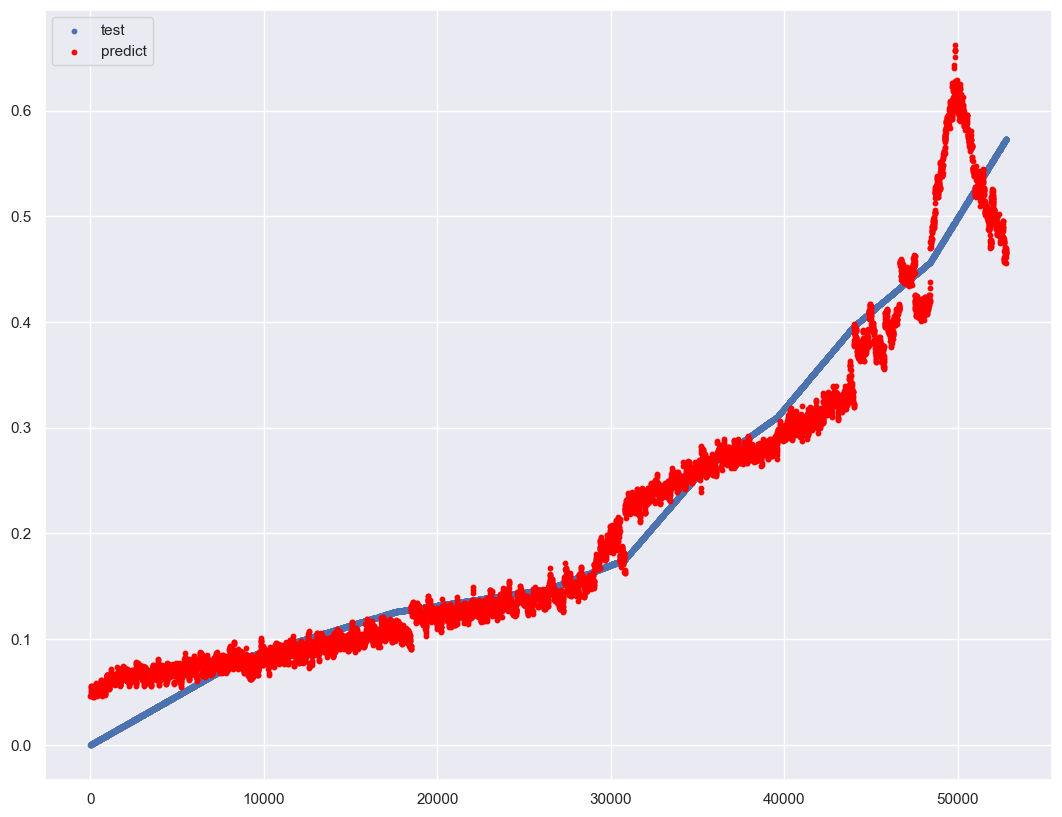

In [331]:
#Testing of Different Thresholds #1

#selecting features that have correlation more than 0.9

rank2 = rank[rank>0.9].sort_values(ascending=False)
newrank2 = rank2.drop('measured_wearout')

#prepare input and output 
x2 = dataframe[newrank2.index]
y2 = dataframe[['measured_wearout']]

#transform the features into standard scaler
scaler = StandardScaler()
x2_scaled_data = scaler.fit_transform(x2)

#split the data into training / testing sets 
#split the data into 80% training, 20% testing randomly
#random_state = 5
x2_train,x2_test,y2_train,y2_test = train_test_split(x2_scaled_data,y2,test_size=0.2,random_state=5)

#build regression model
model2= LinearRegression(fit_intercept=True)
model2.fit(x2_train,y2_train)
y2_pred = model2.predict(x2_test)
plt.scatter(y2_test.index,y2_test,s=10,label='test')
plt.scatter(y2_test.index,y2_pred,color='red',s=10,label='predict')
plt.legend()

#model coefficients 
#random_state = 5
print("Coefficients: ",np.round(model2.coef_,2))
print("Intercepts: ",np.round(model2.intercept_,2))

#evaluation of accuracy 
#random_state = 5
mean_absolute_error = metrics.mean_absolute_error(y2_test,y2_pred)
mse = metrics.mean_squared_error(y2_test,y2_pred)
median_absolute_error = metrics.median_absolute_error(y2_test,y2_pred)
r2 = metrics.r2_score(y2_test,y2_pred)

print('r2: ',round(r2,4))
print('MAE: ',round(mean_absolute_error,4))
print('MSE: ',round(mse,4))
print('RMSE: ',round(np.sqrt(mse),4))

Coefficients:  [[ 0.36 -0.13  2.63 -2.79  0.06 -0.01  0.  ]]
Intercepts:  [0.21]
r2:  0.9553
MAE:  0.0246
MSE:  0.001
RMSE:  0.0315


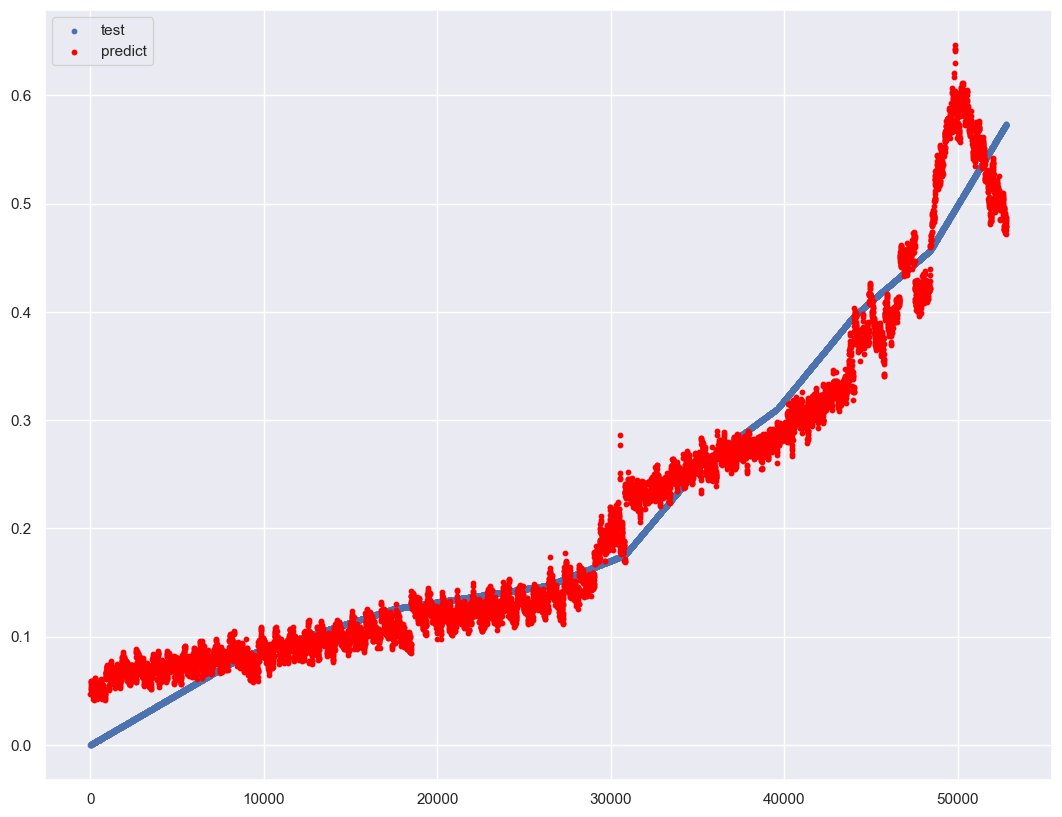

In [332]:
#Testing of Different Thresholds #2

#selecting features that have correlation more than 0.4

rank3 = rank[rank>0.4].sort_values(ascending=False)
newrank3 = rank3.drop('measured_wearout')

#prepare input and output 
x3 = dataframe[newrank3.index]
y3 = dataframe[['measured_wearout']]

#transform the features into standard scaler
scaler = StandardScaler()
x3_scaled_data = scaler.fit_transform(x3)

#split the data into training / testing sets 
#split the data into 80% training, 20% testing randomly
#random_state = 5
x3_train,x3_test,y3_train,y3_test = train_test_split(x3_scaled_data,y3,test_size=0.2,random_state=5)

#build regression model
model3= LinearRegression(fit_intercept=True)
model3.fit(x3_train,y3_train)
y3_pred = model3.predict(x3_test)
plt.scatter(y3_test.index,y3_test,s=10,label='test')
plt.scatter(y3_test.index,y3_pred,color='red',s=10,label='predict')
plt.legend()

#model coefficients 
#random_state = 5
print("Coefficients: ",np.round(model3.coef_,2))
print("Intercepts: ",np.round(model3.intercept_,2))

#evaluation of accuracy 
#random_state = 5
mean_absolute_error = metrics.mean_absolute_error(y3_test,y3_pred)
mse = metrics.mean_squared_error(y3_test,y3_pred)
median_absolute_error = metrics.median_absolute_error(y3_test,y3_pred)
r2 = metrics.r2_score(y3_test,y3_pred)

print('r2: ',round(r2,4))
print('MAE: ',round(mean_absolute_error,4))
print('MSE: ',round(mse,4))
print('RMSE: ',round(np.sqrt(mse),4))

pca.explained_variance_ratio % [35.02 14.38 14.06  7.74  6.58  5.52  4.76  4.57  4.11  2.73  0.36  0.12
  0.06  0.    0.    0.  ]
pca.explained_variance_cum % [ 35.02  49.4   63.46  71.2   77.78  83.3   88.06  92.63  96.74  99.47
  99.83  99.95 100.01 100.01 100.01 100.01]


Text(0.5, 1.0, 'PCA Scree Plot')

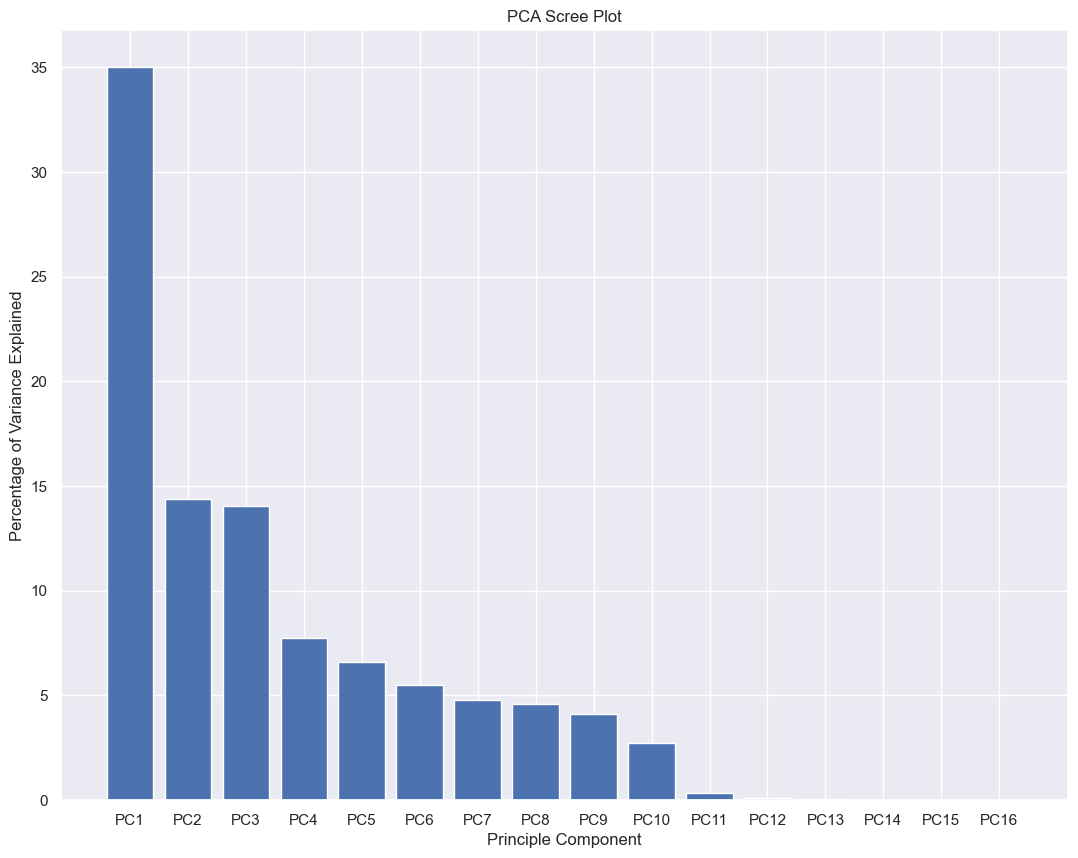

In [333]:
#Principal Components Analysis (PCA) for Single Cutter

#define predictor and response variables 
x_1 = dataframe.drop(['measured_wearout'],axis=1)
y_1 = dataframe['measured_wearout']
x_1 = StandardScaler().fit_transform(x_1)

#scale predictor variables
pca = PCA()
principalComponents = pca.fit_transform(x_1)
principalDataframe = pd.DataFrame(data=principalComponents,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9',
'PC10','PC11','PC12','PC13','PC14','PC15','PC16'])

#perform a scree plot of the principal components 

percent_variance = np.round(pca.explained_variance_ratio_*100,decimals=2)
print('pca.explained_variance_ratio %',percent_variance)
cumsum = np.cumsum(np.round(pca.explained_variance_ratio_,decimals=4)*100)
print('pca.explained_variance_cum %',cumsum)

columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16']

fig = plt.figure()

plt.bar(x=range(1,17),height=percent_variance,tick_label=columns)
plt.rcParams['figure.figsize'] = (10,5)
plt.ylabel('Percentage of Variance Explained')
plt.xlabel('Principle Component')
plt.title('PCA Scree Plot')

In [334]:
#split the dataset into training (80%) and testing (20%) sets
#random_state = 5
x_1_train,x_1_test,y_1_train,y_1_test = train_test_split(x_1,y_1,test_size=0.2,random_state=5)
#scale the training and testing data
x_1_train = StandardScaler().fit_transform(x_train)
x_1_test = StandardScaler().fit_transform(x_test)
x_1_pca_train = pca.fit_transform(x_1_train)
x_1_pca_test = pca.transform(x_1_test)
print("x_pca_train")
print(x_1_pca_train[0:17])
print("x_pca_test")
print(x_1_pca_test[0:17])

x_pca_train
[[-1.06503682e+00  1.76100763e+00  8.42681647e-01  2.28072013e-02
   2.32553354e+00 -1.51116171e+00 -1.83734836e-01  4.58691060e-01
  -3.43959589e-01 -6.21211086e-01 -1.70469211e-01 -5.30586177e-02
  -4.06282582e-02  4.45796657e-03  2.10832072e-02 -7.09730630e-04]
 [-8.77338048e-01  1.90620310e+00 -3.16463646e-01  1.35385114e+00
  -6.12235779e-01 -7.73947753e-01  6.82775652e-01 -5.13844892e-01
  -1.47083688e-01 -4.74933268e-01 -2.46094057e-01  9.99744100e-02
  -2.78796438e-02  6.48877971e-03  6.39577717e-03 -4.88134835e-04]
 [ 3.67088236e-02 -2.11558393e+00 -6.12585450e-01 -9.90073329e-01
   1.40734212e-01 -1.12084109e+00  2.52647248e-01 -5.92393486e-01
  -4.04782318e-01  2.76670526e-01 -2.53083208e-01  1.26466203e-01
  -9.75017990e-02 -9.15400143e-03  5.56065705e-04 -8.28786560e-05]
 [-1.97551636e+00  9.33510713e-01 -6.86387733e-01 -6.16193721e-01
  -5.47951128e-01 -5.23499791e-01  2.27745676e-01 -3.01853375e-01
   4.03360572e-01  1.16310621e-01  1.71718616e-01 -3.01546483

principle component = 1
mse_score 0.041
Coefficient of determination: 0.922
principle component = 2
mse_score 0.038
Coefficient of determination: 0.935
principle component = 3
mse_score 0.038
Coefficient of determination: 0.936
principle component = 4
mse_score 0.037
Coefficient of determination: 0.937
principle component = 5
mse_score 0.037
Coefficient of determination: 0.937
principle component = 6
mse_score 0.037
Coefficient of determination: 0.937
principle component = 7
mse_score 0.037
Coefficient of determination: 0.938
principle component = 8
mse_score 0.037
Coefficient of determination: 0.938
principle component = 9
mse_score 0.035
Coefficient of determination: 0.944
principle component = 10
mse_score 0.033
Coefficient of determination: 0.951
principle component = 11
mse_score 0.029
Coefficient of determination: 0.961
principle component = 12
mse_score 0.029
Coefficient of determination: 0.961
principle component = 13
mse_score 0.029
Coefficient of determination: 0.961
principl

Text(0.5, 1.0, 'measured wearout')

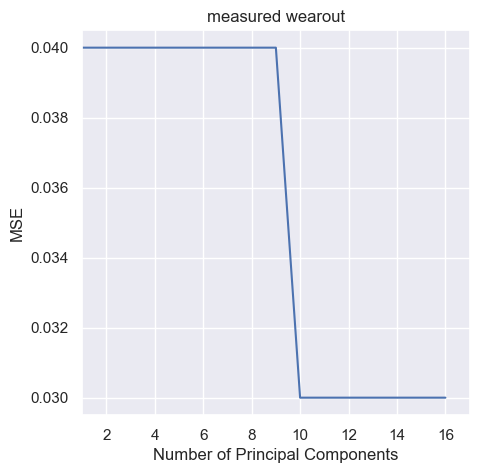

In [335]:
#define an empty array for mse_score

mse_score = []
pca_number = []

#using different numbers of PCA to train and test model
#train PCR model on training data

for i in np.arange(1, 17):
    regr = LinearRegression()
    regr.fit(x_1_pca_train[:,:i], y_train)

#predict and calculate RMSE

    pred = regr.predict(x_1_pca_test[:,:i])
    score = np.sqrt(mean_squared_error(y_test, pred))
    mse_score.append(score.round(2))
    pca_number.append(i)
    print("principle component =", i)
    print("mse_score", score.round(3))
    print("Coefficient of determination: %.3f" % r2_score(y_test, pred))

# Plot results
plt.figure(figsize=(5,5))
plt.xlim([1,17])
plt.plot(pca_number, mse_score)
plt.xlabel('Number of Principal Components')
plt.ylabel('MSE')
plt.title('measured wearout')

principle component = 10
mse_score 0.033
Coefficient of determination: 0.951


<AxesSubplot: >

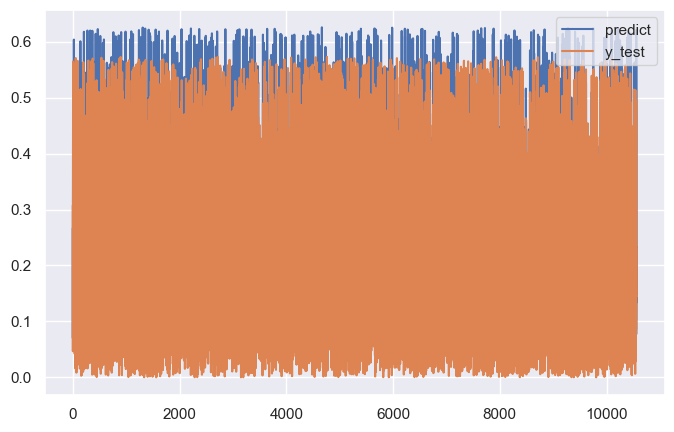

In [336]:
#Best PCA number is 10
i = 10
regr = LinearRegression()
regr.fit(x_1_pca_train[:,:i], y_train)

#predict and calculate RMSE

pred = regr.predict(x_1_pca_test[:,:i])
score = np.sqrt(mean_squared_error(y_test, pred))
mse_score.append(score.round(2))
pca_number.append(i)
print("principle component =", i)
print("mse_score", score.round(3))
print("Coefficient of determination: %.3f" % r2_score(y_test, pred))
y_test1 = y_test.reset_index()
y_test2= y_test1['measured_wearout']

df = pd.DataFrame()
df["y_test"] = pd.DataFrame(y_test2)
df["predict"] = pred
df["predict"].plot(figsize=(8,5),legend = True)
df["y_test"].plot(figsize=(8,5),legend = True)

Coefficients:  [0.14]
intercept:  0.21


Text(0.5, 1.0, 'PC1')

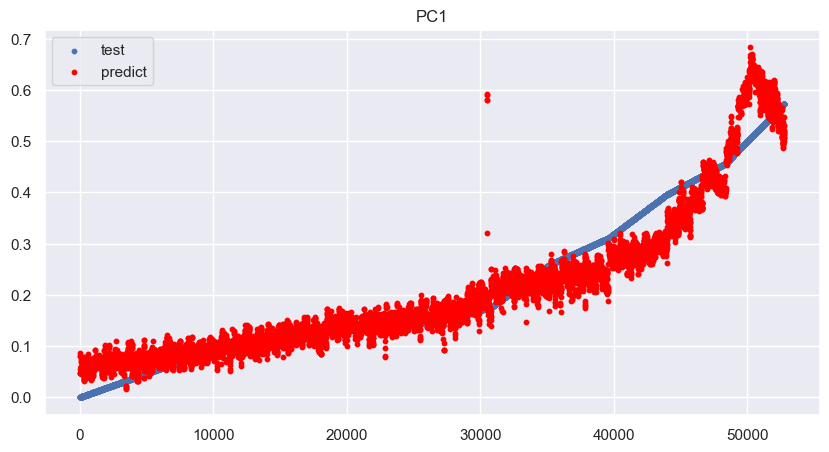

In [337]:
#Selecting PC1 and Rebuild a Regression Model 

#Prepare input X and output y
X = principalDataframe[['PC1']]
y = dataframe['measured_wearout']
#transform the features to standard scaler
scaler = StandardScaler()
X_scaled_data = scaler.fit_transform(X)

# Split the data into training/testing sets
#split data into 80% training, 20% testing randomly
X_train, X_test, y_train, y_test = train_test_split(X_scaled_data, y, test_size = 0.2, random_state=5)

#build up multiple linear regrerssion model
model4 = LinearRegression(fit_intercept=True)
model4.fit(X_train, y_train)
# model coefficients
print("Coefficients: ", np.round(model4.coef_, 2))
# model intercept
print("intercept: ", np.round(model4.intercept_,2))

# model estimate
y_pred = model4.predict(X_test)
plt.figure(figsize=(10,5))
plt.scatter(y_test.index, y_test, s =10, label='test')
plt.scatter(y_test.index, y_pred, color='red', s=10,label='predict')
plt.legend()
plt.title('PC1')

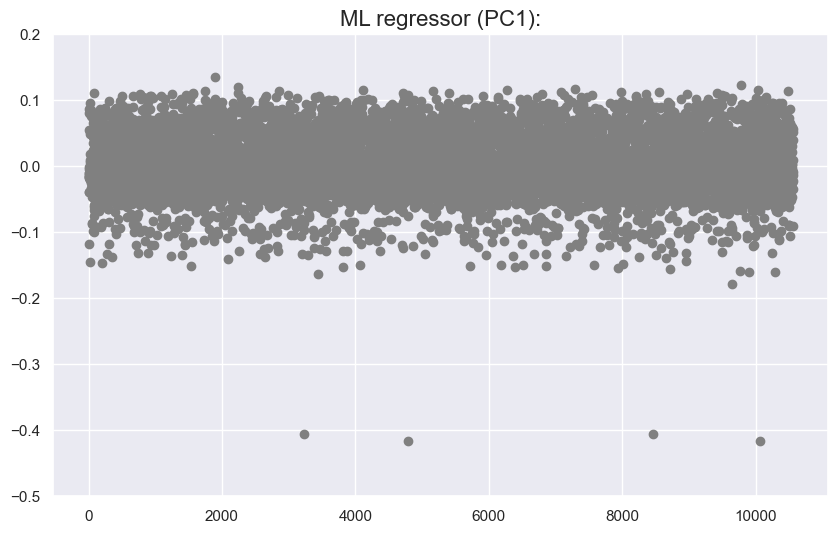

In [338]:
#Error Analysis For PC1 
index_list = []
for i in range(0, len(y_pred)):
    index_list.append(i)
plt.figure(figsize=(10, 6))
plt.title("ML regressor (PC1):", size=16)
plt.scatter(index_list, y_test-y_pred, c='grey')
plt.ylim(-0.5,0.2)
plt.show()

Coefficients:  [0.14]
intercept:  0.21


Text(0.5, 1.0, 'PC10')

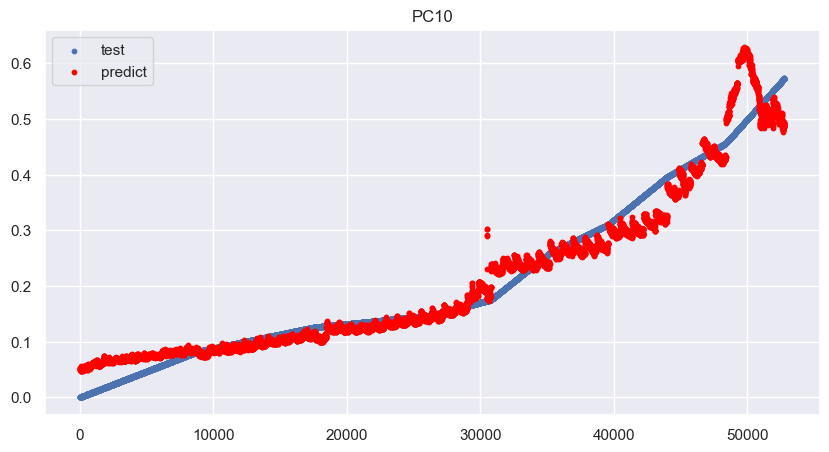

In [339]:
#Selecting PC1 to PC10 and Rebuild a Regression Model

#Prepare input X and output y
newx = principalDataframe[['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10']]
newy = dataframe['measured_wearout']
#transform the features to standard scaler
scaler = StandardScaler()
newx_scaled_data = scaler.fit_transform(newx)

# Split the data into training/testing sets
#split data into 80% training, 20% testing randomly
newx_train, newx_test, newy_train, newy_test = train_test_split(newx_scaled_data, newy, test_size = 0.2, random_state=5)

#build up multiple linear regrerssion model
model5 = LinearRegression(fit_intercept=True)
model5.fit(newx_train, newy_train)
# model coefficients
print("Coefficients: ", np.round(model4.coef_, 2))
# model intercept
print("intercept: ", np.round(model4.intercept_,2))

# model estimate
newy_pred = model5.predict(newx_test)
plt.figure(figsize=(10,5))
plt.scatter(newy_test.index, newy_test, s =10, label='test')
plt.scatter(newy_test.index, newy_pred, color='red', s=10,label='predict')
plt.legend()
plt.title('PC10')

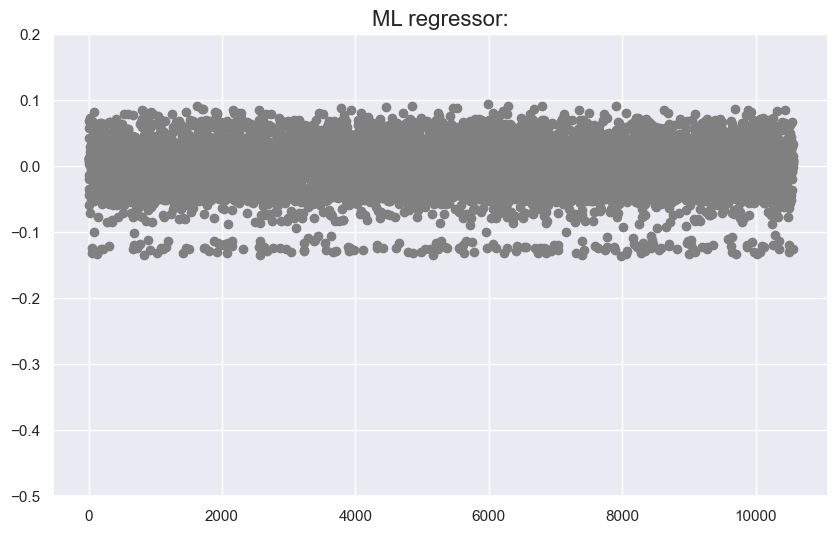

In [340]:
#Error Analysis for PC10 
index_list = []
for i in range(0, len(newy_pred)):
    index_list.append(i)
plt.figure(figsize=(10, 6))
plt.title("ML regressor:", size=16)
plt.scatter(index_list, newy_test-newy_pred, c='grey')
plt.ylim(-0.5,0.2)
plt.show()

Coefficients:  [[-0.    0.61  0.69 -0.77 -0.01  0.2   0.   -0.09  0.    0.    0.06  0.
   0.   -0.61 -0.02  0.  ]]
intercept:  [0.21]
r2:  0.8969
MAE:  0.0404
MSE:  0.0031
RMSE:  0.056


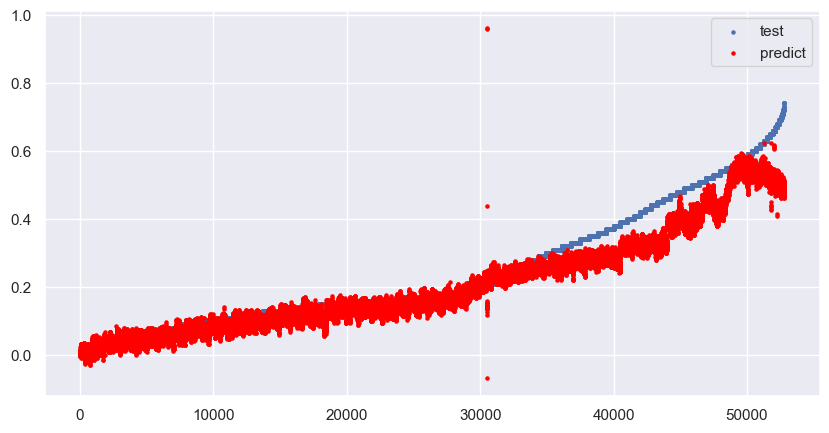

In [341]:
#2 Cutters (16 Parameters)
#Experiment6 as training and Experiment6_1 as testing

dataframe_1 = dataframe.drop(['measured_wearout'],axis=1)
dataframe_2 = dataframe2.drop(['measured_wearout'],axis=1)

#input is X output is Y 
#training data / experiment6 
Xtrain = dataframe_1
y_train = dataframe['measured_wearout']

#testing data / experiment6_1 
Xtest = dataframe_2
y_test = dataframe2['measured_wearout']



#transform the features to standard scaler
scaler = StandardScaler()
X_scaled_data = scaler.fit_transform(Xtrain)
X_scaledtest_data = scaler.fit_transform(Xtest)

X_train = X_scaled_data
X_test = X_scaledtest_data

#model estimate
model6 = LinearRegression(fit_intercept=True)
model6.fit(X_train, y_train)
y_pred = model6.predict(X_test)
plt.scatter(y_test.index,y_test,s=5,label='test')
plt.scatter(y_test.index,y_pred,c='red',s=5,label='predict')
plt.legend()
# model coefficients
print("Coefficients: ", np.round(model.coef_, 2))
# model intercept
print("intercept: ", np.round(model.intercept_,2))

#evaluation of accuracy 
mean_absolute_error = metrics.mean_absolute_error(y_test,y_pred)
mse = metrics.mean_squared_error(y_test,y_pred)
median_absolute_error = metrics.median_absolute_error(y_test,y_pred)
r2 = metrics.r2_score(y_test,y_pred)

print('r2: ',round(r2,4))
print('MAE: ',round(mean_absolute_error,4))
print('MSE: ',round(mse,4))
print('RMSE: ',round(np.sqrt(mse),4))

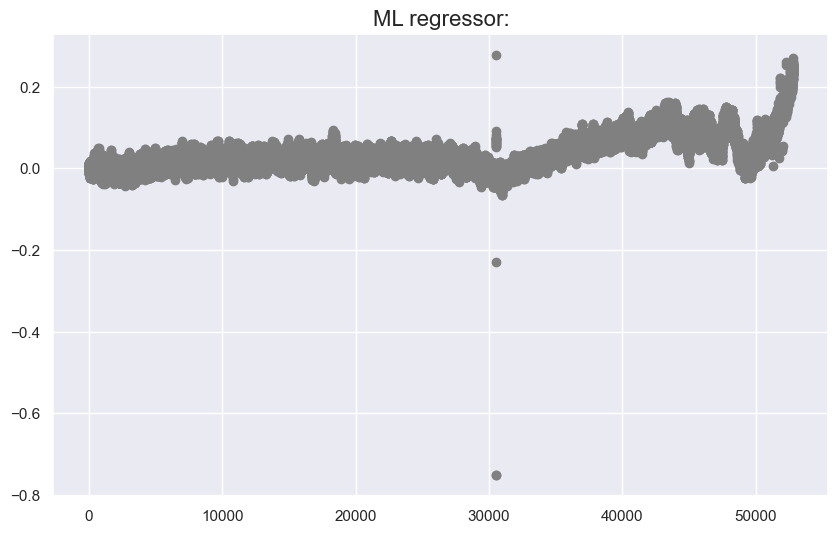

In [342]:
#Error Analysis for 2 cutters (16 Parameters)
index_list = []
for i in range(0, len(y_pred)):
    index_list.append(i)
y_residual = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.title("ML regressor:", size=16)
plt.scatter(index_list, y_residual, c='grey')
plt.show()

In [343]:
#Correlation Analysis for 2 Cutters

corr = dataframe.corr(method='pearson')
corr.style.background_gradient(cmap='coolwarm')


,dx,fa,fca,fm,fod,fstd,kpr,kts,ra,re,skew,sod,sre,std,thp,vf,measured_wearout
dx,1.000000,-0.016397,-0.015566,-0.016382,0.151485,-0.019501,0.236075,0.020401,0.024571,0.149882,0.014379,0.024294,-0.053832,-0.016547,-0.030861,-0.038910,-0.018769
fa,-0.016397,1.000000,0.993651,0.999998,-0.021336,0.969552,-0.008399,-0.452833,-0.344020,-0.022650,0.017841,-0.000685,0.443811,0.996317,0.213484,0.009565,0.951356
fca,-0.015566,0.993651,1.000000,0.993673,-0.019614,0.941937,-0.010766,-0.541523,-0.342532,-0.021260,-0.076571,-0.001175,0.457496,0.998297,0.121392,0.012908,0.969499
fm,-0.016382,0.999998,0.993673,1.000000,-0.021310,0.969449,-0.008407,-0.452830,-0.344036,-0.022629,0.018066,-0.000680,0.443857,0.996312,0.213163,0.009567,0.951441
fod,0.151485,-0.021336,-0.019614,-0.021310,1.000000,-0.027488,0.181637,0.024408,0.013893,0.935470,0.013342,0.419819,-0.104734,-0.023502,-0.069457,0.164729,-0.025214
fstd,-0.019501,0.969552,0.941937,0.969449,-0.027488,1.000000,-0.010707,-0.313568,-0.350943,-0.026561,0.140911,0.000067,0.413065,0.957079,0.421187,0.005785,0.888271
kpr,0.236075,-0.008399,-0.010766,-0.008407,0.181637,-0.010707,1.000000,0.020649,0.081879,0.172510,0.015743,0.062578,-0.051411,-0.011049,-0.012199,0.013630,-0.013814
kts,0.020401,-0.452833,-0.541523,-0.452830,0.024408,-0.313568,0.020649,1.000000,0.130769,0.029795,0.815291,0.001924,-0.364388,-0.522195,0.479635,-0.035926,-0.618220
ra,0.024571,-0.344020,-0.342532,-0.344036,0.013893,-0.350943,0.081879,0.130769,1.000000,0.014659,-0.044246,0.002104,-0.084092,-0.344512,-0.091661,0.004326,-0.319012
re,0.149882,-0.022650,-0.021260,-0.022629,0.935470,-0.026561,0.172510,0.029795,0.014659,1.000000,0.015405,0.139707,-0.161435,-0.025180,-0.063560,0.058114,-0.027610


In [344]:
#ranking the correlation with respect to the output in descending
rank = abs(dataframe.corr()['measured_wearout']).sort_values(ascending=False)
rank

measured_wearout    1.000000
fca                 0.969499
std                 0.964946
fm                  0.951441
fa                  0.951356
fstd                0.888271
kts                 0.618220
sre                 0.471281
ra                  0.319012
skew                0.139001
thp                 0.040492
re                  0.027610
fod                 0.025214
dx                  0.018769
vf                  0.017909
kpr                 0.013814
sod                 0.000140
Name: measured_wearout, dtype: float64

Coefficients:  [[ 0.4  -0.04  2.4  -2.68  0.06]]
Intercepts:  [0.21]
r2:  0.8833
MAE:  0.0458
MSE:  0.0036
RMSE:  0.0596


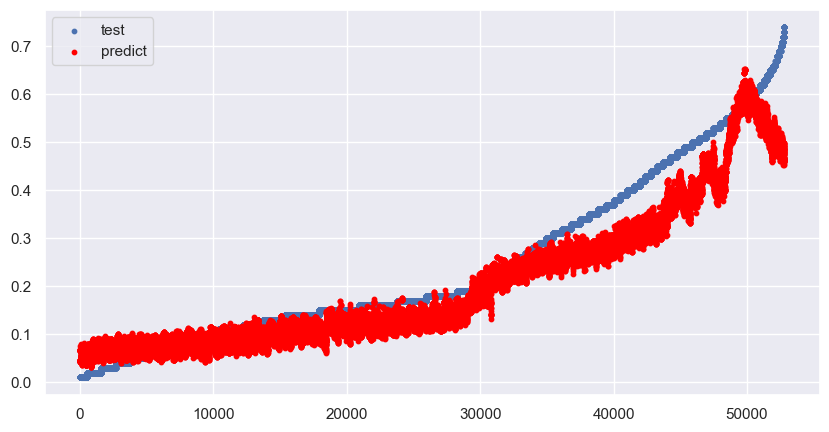

In [345]:
#selecting features that have correlation more than 0.7
rank4 = rank[rank>0.7].sort_values(ascending=False)
newrank4 = rank4.drop('measured_wearout')

#prepare input and output 

#training data / experiment6
X1train = dataframe[newrank4.index]
y1train = dataframe[['measured_wearout']]

#testing data / experiment6_1
X1test = dataframe2[newrank4.index]
y1test = dataframe2[['measured_wearout']]

#transform the features into standard scaler
scaler = StandardScaler()
X1_scaled_data = scaler.fit_transform(X1train)
X1_scaledtest_data = scaler.fit_transform(X1test)
X1_train = X1_scaled_data
X1_test = X1_scaledtest_data

#build regression model
model7= LinearRegression(fit_intercept=True)
model7.fit(X1_train,y1train)
ypred = model7.predict(X1_test)
plt.scatter(y1test.index,y1test,s=10,label='test')
plt.scatter(y1test.index,ypred,c='red',s=10,label='predict')
plt.legend()
 
#model coefficients 
print("Coefficients: ",np.round(model7.coef_,2))
print("Intercepts: ",np.round(model7.intercept_,2))

#evaluation of accuracy 
mean_absolute_error = metrics.mean_absolute_error(y1test,ypred)
mse = metrics.mean_squared_error(y1test,ypred)
median_absolute_error = metrics.median_absolute_error(y1test,ypred)
r2 = metrics.r2_score(y1test,ypred)

print('r2: ',round(r2,4))
print('MAE: ',round(mean_absolute_error,4))
print('MSE: ',round(mse,4))
print('RMSE: ',round(np.sqrt(mse),4))


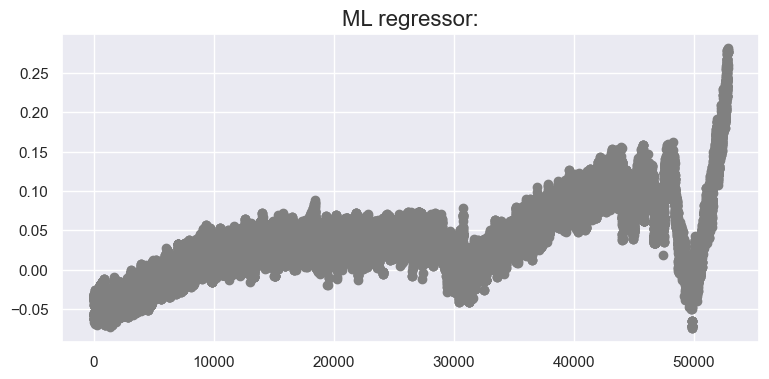

In [346]:
#Error Analysis for Correlation Matrix 2 Cutters

index_list = []
for i in range(0, len(ypred)):
    index_list.append(i)
yresidual = y1test - ypred
plt.figure(figsize=(9, 4))
plt.title("ML regressor:", size=16)
plt.scatter(index_list, yresidual, c='grey')
plt.show()

Coefficients:  [[ 0.2   0.12  2.23 -2.4 ]]
Intercepts:  [0.21]
r2:  0.8823
MAE:  0.0456
MSE:  0.0036
RMSE:  0.0599


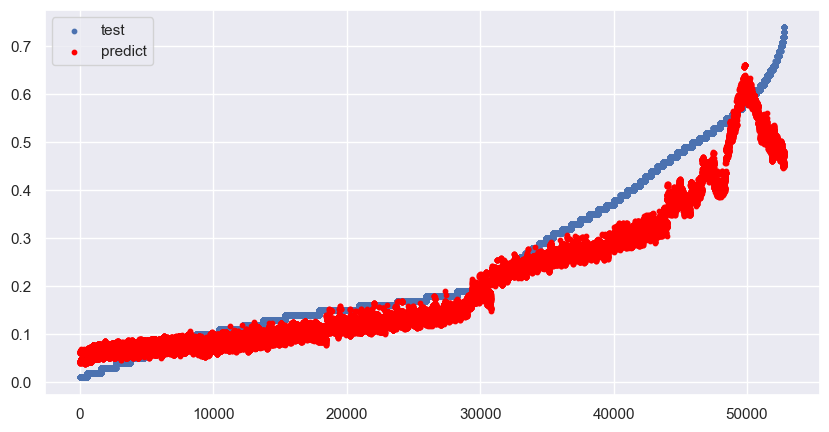

In [347]:
#Testing of Different Thresholds #1

#selecting features that have correlation more than 0.9
rank5 = rank[rank>0.9].sort_values(ascending=False)
newrank5 = rank5.drop('measured_wearout')

#prepare input and output 

#training data / experiment6
X1train2 = dataframe[newrank5.index]
y1train2= dataframe[['measured_wearout']]

#testing data / experiment6_1
X1test2 = dataframe2[newrank5.index]
y1test2 = dataframe2[['measured_wearout']]

#transform the features into standard scaler
scaler = StandardScaler()
X1_scaled_data2 = scaler.fit_transform(X1train2)
X1_scaledtest_data2 = scaler.fit_transform(X1test2)
X1_train2 = X1_scaled_data2
X1_test2 = X1_scaledtest_data2

#build regression model
model7= LinearRegression(fit_intercept=True)
model7.fit(X1_train2,y1train2)
ypred = model7.predict(X1_test2)
plt.scatter(y1test2.index,y1test2,s=10,label='test')
plt.scatter(y1test2.index,ypred,c='red',s=10,label='predict')
plt.legend()
 
#model coefficients 
print("Coefficients: ",np.round(model7.coef_,2))
print("Intercepts: ",np.round(model7.intercept_,2))

#evaluation of accuracy 
mean_absolute_error = metrics.mean_absolute_error(y1test,ypred)
mse = metrics.mean_squared_error(y1test,ypred)
median_absolute_error = metrics.median_absolute_error(y1test,ypred)
r2 = metrics.r2_score(y1test,ypred)

print('r2: ',round(r2,4))
print('MAE: ',round(mean_absolute_error,4))
print('MSE: ',round(mse,4))
print('RMSE: ',round(np.sqrt(mse),4))



In [348]:
#Testing of Different Thresholds #2

#selecting features that have correlation more than 0.4

rank6 = rank[rank>0.4].sort_values(ascending=False)
newrank6 = rank6.drop('measured_wearout')

#prepare input and output 

#training data / experiment6
X1train = dataframe[newrank6.index]
y1train = dataframe[['measured_wearout']]

#testing data / experiment6_1
X1test = dataframe2[newrank6.index]
y1test = dataframe2[['measured_wearout']]

#build regression model
model7= LinearRegression(fit_intercept=True)
model7.fit(X1train,y1train)
ypred = model7.predict(X1test)

#model coefficients 
print("Coefficients: ",np.round(model7.coef_,2))
print("Intercepts: ",np.round(model7.intercept_,2))

#evaluation of accuracy 
mean_absolute_error = metrics.mean_absolute_error(y1test,ypred)
mse = metrics.mean_squared_error(y1test,ypred)
median_absolute_error = metrics.median_absolute_error(y1test,ypred)
r2 = metrics.r2_score(y1test,ypred)

print('r2: ',round(r2,4))
print('MAE: ',round(mean_absolute_error,4))
print('MSE: ',round(mse,4))
print('RMSE: ',round(np.sqrt(mse),4))

Coefficients:  [[ 0.8  -0.28  2.33 -2.47  0.62 -0.1  37.01]]
Intercepts:  [-0.15]
r2:  0.8785
MAE:  0.0471
MSE:  0.0037
RMSE:  0.0608


pca.explained_variance_ratio % [35.02 14.38 14.06  7.74  6.58  5.52  4.76  4.57  4.11  2.73  0.36  0.12
  0.06  0.    0.    0.  ]
pca,explained_variance_cum % [ 35.02  49.4   63.46  71.2   77.78  83.3   88.06  92.63  96.74  99.47
  99.83  99.95 100.01 100.01 100.01 100.01]


Text(0.5, 1.0, 'PCA Scree Plot')

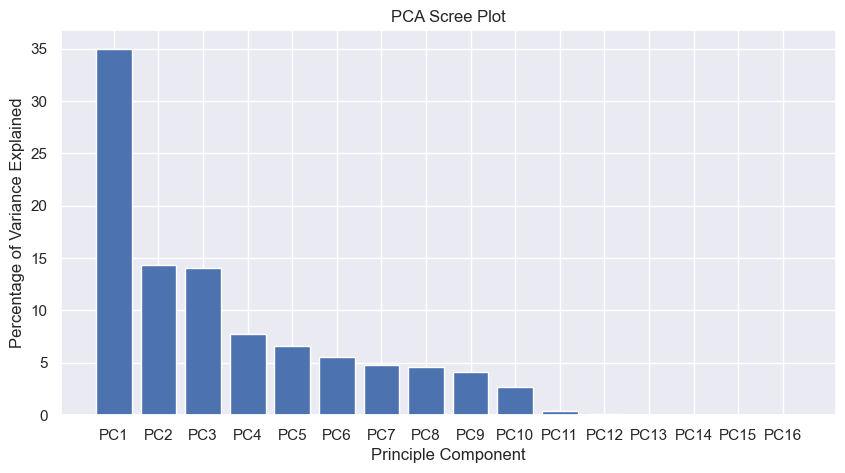

In [349]:
#Principal of Component Analysis (PCA) for 2 Cutters
#experiment6
#for training dataset

#define predictor and response variables 
from sklearn.decomposition import PCA
X2 = dataframe.drop(['measured_wearout'],axis=1)
X2 = StandardScaler().fit_transform(X2)

#scale predictor variables
pca = PCA(n_components=16)
principalComponents = pca.fit_transform(X2)
principalDataframe = pd.DataFrame(data=principalComponents,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9',
'PC10','PC11','PC12','PC13','PC14','PC15','PC16'])

#perform a scree plot of the principal components 

percent_variance = np.round(pca.explained_variance_ratio_*100,decimals=2)
print('pca.explained_variance_ratio %',percent_variance)
cumsum = np.cumsum(np.round(pca.explained_variance_ratio_,decimals=4)*100)
print('pca,explained_variance_cum %',cumsum)

columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16']

fig = plt.figure()

plt.bar(x=range(1,17),height=percent_variance,tick_label=columns)
plt.rcParams['figure.figsize'] = (13,2)
plt.ylabel('Percentage of Variance Explained')
plt.xlabel('Principle Component')
plt.title('PCA Scree Plot')

pca.explained_variance_ratio % [40.56 17.5   9.77  7.77  7.62  7.17  5.64  3.42  0.45  0.08  0.    0.
  0.    0.    0.    0.  ]
pca,explained_variance_cum % [40.56 58.06 67.83 75.6  83.22 90.39 96.03 99.45 99.9  99.98 99.98 99.98
 99.98 99.98 99.98 99.98]


Text(0.5, 1.0, 'PCA Scree Plot')

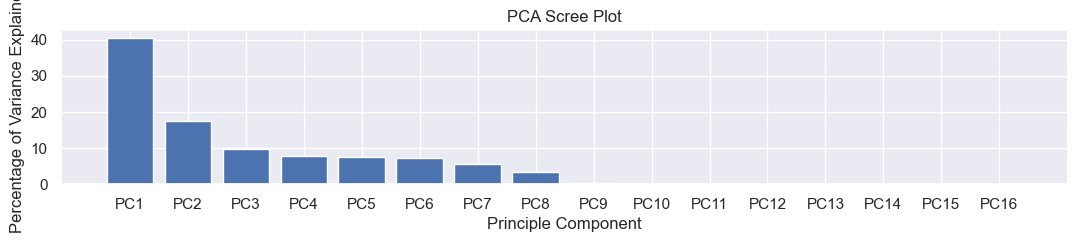

In [350]:
#Principal of Component Analysis (PCA) for 2 Cutters
#experiment6_1
#for testing dataset

#define predictor and response variables 
from sklearn.decomposition import PCA
X3 = dataframe2.drop(['measured_wearout'],axis=1)
X3 = StandardScaler().fit_transform(X3)

#scale predictor variables
pca1 = PCA(n_components=16)
principalComponents1 = pca1.fit_transform(X3)
principalDataframe1= pd.DataFrame(data=principalComponents1,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9',
'PC10','PC11','PC12','PC13','PC14','PC15','PC16'])

#perform a scree plot of the principal components 
percent_variance1 = np.round(pca1.explained_variance_ratio_*100,decimals=2)
print('pca.explained_variance_ratio %',percent_variance1)
cumsum1 = np.cumsum(np.round(pca1.explained_variance_ratio_,decimals=4)*100)
print('pca,explained_variance_cum %',cumsum1)

columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16']

fig = plt.figure()

plt.bar(x=range(1,17),height=percent_variance1,tick_label=columns)
plt.rcParams['figure.figsize'] = (13,10)
plt.ylabel('Percentage of Variance Explained')
plt.xlabel('Principle Component')
plt.title('PCA Scree Plot')

In [351]:
#Put PCA into Training and Testing Accordingly

x_pca_train_2 = principalComponents
x_pca_test_2 = principalComponents1
print("x_pca_train")
print(x_pca_train_2[0:17])
print("x_pca_test")
print(x_pca_test_2[0:17])

x_pca_train
[[-2.41353691e+00 -6.02672137e-01  1.12405575e+00 -4.76114122e-01
   5.75419479e-01 -7.84177535e-01 -1.16518649e+00  3.55792831e-01
   4.34727903e-01  8.18638938e-01  5.89777023e-01 -1.27483601e-01
   6.48210214e-02 -1.96747556e-02 -2.37950207e-03 -8.52337103e-04]
 [-2.50483854e+00 -7.64463533e-01  5.75371684e-01 -4.08319550e-02
   6.24283046e-01 -1.15805998e+00  9.43894288e-01 -4.73461191e-01
  -2.04734000e-01  8.40468112e-01  5.68524160e-01 -2.47891150e-01
   9.24673633e-03 -1.60410578e-02  1.03863577e-02 -1.13491552e-03]
 [-2.54576039e+00 -7.23969800e-01  5.68575948e-01 -9.64340348e-01
   1.12677203e+00 -4.72679141e-01 -1.13828406e+00  7.44231311e-01
   2.85086059e-01  8.01020919e-01  5.63220078e-01 -5.11146189e-02
   2.00949231e-02 -1.90371713e-02  7.65822904e-03 -1.11827432e-03]
 [-2.57617995e+00 -9.01578959e-01 -6.04381188e-02 -1.35299417e-01
   7.34121480e-01 -6.90791722e-01  5.32942222e-01  1.66385493e-01
  -1.80528831e-01  8.34021285e-01  5.50911236e-01 -2.01950419

principle component = 1
mse_score 0.068
Coefficient of determination: 0.849
principle component = 2
mse_score 0.064
Coefficient of determination: 0.867
principle component = 3
mse_score 0.064
Coefficient of determination: 0.867
principle component = 4
mse_score 0.064
Coefficient of determination: 0.866
principle component = 5
mse_score 0.064
Coefficient of determination: 0.866
principle component = 6
mse_score 0.064
Coefficient of determination: 0.867
principle component = 7
mse_score 0.064
Coefficient of determination: 0.867
principle component = 8
mse_score 0.063
Coefficient of determination: 0.868
principle component = 9
mse_score 0.063
Coefficient of determination: 0.872
principle component = 10
mse_score 0.063
Coefficient of determination: 0.871
principle component = 11
mse_score 0.063
Coefficient of determination: 0.871
principle component = 12
mse_score 0.063
Coefficient of determination: 0.872
principle component = 13
mse_score 0.063
Coefficient of determination: 0.872
principl

Text(0.5, 1.0, 'measured wearout')

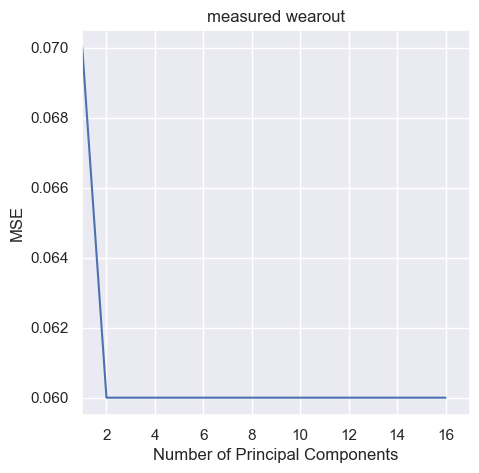

In [352]:
#define an empty array for mse_score
y_training=dataframe['measured_wearout']
y_testing=dataframe2['measured_wearout']
mse_score = []
pca_number = []

#using different numbers of PCA to train and test model
#train PCR model on training data

for i in np.arange(1, 17):
    regr2 = LinearRegression()
    regr2.fit(x_pca_train_2[:,:i], y_training)

#predict and calculate RMSE

    predict = regr2.predict(x_pca_test_2[:,:i])
    score = np.sqrt(mean_squared_error(y_testing, predict))
    mse_score.append(score.round(2))
    pca_number.append(i)
    print("principle component =", i)
    print("mse_score", score.round(3))
    print("Coefficient of determination: %.3f" % r2_score(y_testing, predict))

# Plot results
plt.figure(figsize=(5,5))
plt.xlim([1,17])
plt.plot(pca_number, mse_score)
plt.xlabel('Number of Principal Components')
plt.ylabel('MSE')
plt.title('measured wearout')

principle component = 2
mse_score 0.064
Coefficient of determination: 0.867


<AxesSubplot: >

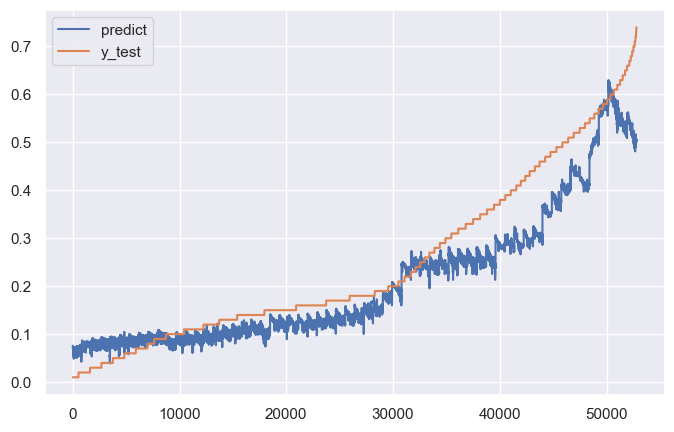

In [353]:
#Based on the results above, best PC number is 2, r square drops slightly afterwards

i = 2
regr2 = LinearRegression()
regr2.fit(x_pca_train_2[:,:i], y_training)

#predict and calculate RMSE

predict = regr2.predict(x_pca_test_2[:,:i])
score = np.sqrt(mean_squared_error(y_testing, predict))
mse_score.append(score.round(2))
pca_number.append(i)
print("principle component =", i)
print("mse_score", score.round(3))
print("Coefficient of determination: %.3f" % r2_score(y_testing, predict))
y_testing1 = y_testing.reset_index()
y_testing2= y_testing1['measured_wearout']

df = pd.DataFrame()
df["y_test"] = pd.DataFrame(y_testing2)
df["predict"] = predict
df["predict"].plot(figsize=(8,5),legend = True)
df["y_test"].plot(figsize=(8,5),legend = True)

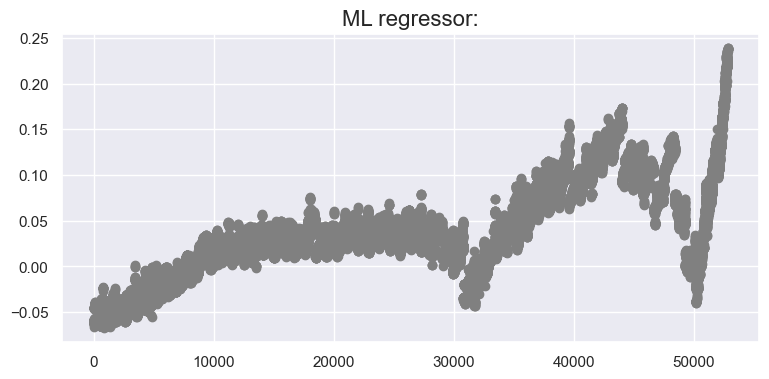

In [354]:
#Error Analysis for PCA 2 Cutters

index_list = []
for i in range(0, len(predict)):
    index_list.append(i)
yresidual2 = y_testing - predict
plt.figure(figsize=(9, 4))
plt.title("ML regressor:", size=16)
plt.scatter(index_list, yresidual2, c='grey')
plt.show()
